In [7]:
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import random
from sklearn.decomposition import PCA
import seaborn as sn
from scipy import stats
import skfuzzy
from skfuzzy import control as ctrl
from sklearn.metrics import accuracy_score
from mat4py import loadmat
from sklearn.datasets import load_digits
from sklearn.datasets import fetch_openml

In [8]:
# data = loadmat('emnist-digits-150.mat')
# a = data['dataset']
# b = a['DigitImage']
# images = b['images']
# labels = b['labels']
# digits = np.array(images)
# bwdigits = digits

In [9]:
mist = fetch_openml('mnist_784', version=1)

In [74]:
digits = np.array(mist.data)
labels = mist.target
digits= digits[0:2000]
labels = labels[0:2000]



In [75]:
label = []
for i in range (len(labels)):
    label.append(int(labels[i][0]))

In [76]:
class PreprocessData:
    def NomalizeData(Data):
        Data=np.array(Data)
        lenght = len(Data)
        normalizedData = []
        
        for i in range (lenght):
            normalizedData.append(float((Data[i] - min(Data) ) / ( max(Data) - min(Data)) ))
            
        return normalizedData
    
    def TestAndTrain(Data , PercentageOfTrainData):
        PercentageOfTrainData = float(PercentageOfTrainData / 100)
        Train_DataFrame = Data.sample(frac=PercentageOfTrainData)
        Test_DataFrame =Data.drop(Train_DataFrame.index)
        
        return Train_DataFrame , Test_DataFrame

In [77]:
# extracting features from pca method 
pca=PCA(n_components=15)
pca.fit(digits)
NewDigits=pca.transform(digits)
newww = NewDigits[:,0:2]

In [78]:
Data = pd.DataFrame(NewDigits, columns = ['f1','f2','f3','f4','f5','f6','f7','f8','f9','f10','f11','f12','f13','f14','f15'])
# Data = pd.DataFrame(newww, columns = ['f1','f2'])
Data['TARGET'] = label
Data['f1'] = Data['f1']+(abs(Data['f1'].min()))
Data['f2'] = Data['f2']+(abs(Data['f2'].min()))
Data['f3'] = Data['f3']+(abs(Data['f3'].min()))
Data['f4'] = Data['f4']+(abs(Data['f4'].min()))
Data['f5'] = Data['f5']+(abs(Data['f5'].min()))
Data['f6'] = Data['f6']+(abs(Data['f6'].min()))
Data['f7'] = Data['f7']+(abs(Data['f7'].min()))
Data['f8'] = Data['f8']+(abs(Data['f8'].min()))
Data['f9'] = Data['f9']+(abs(Data['f9'].min()))
Data['f10'] = Data['f10']+(abs(Data['f10'].min()))
Data['f11'] = Data['f11']+(abs(Data['f11'].min()))
Data['f12'] = Data['f12']+(abs(Data['f12'].min()))
Data['f13'] = Data['f13']+(abs(Data['f13'].min()))
Data['f14'] = Data['f14']+(abs(Data['f14'].min()))
Data['f15'] = Data['f15']+(abs(Data['f15'].min()))
Data

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,TARGET
0,1222.293634,1476.144567,1092.046684,563.513312,1230.422868,532.438998,979.317653,791.277341,1255.666615,808.313602,810.698843,529.158252,146.340614,540.996288,364.717722,5
1,2120.786913,1579.509787,1462.692789,846.892208,362.034118,562.236245,1065.102487,726.560379,580.640825,687.182320,276.248474,962.164013,180.729897,643.410994,944.374994,0
2,949.973949,686.290710,1075.530314,1664.898883,657.765856,1203.141732,212.503596,936.111459,1057.952445,767.925680,1131.638463,635.959416,540.370751,684.425421,947.496146,4
3,118.950427,1789.726818,1327.542828,1092.872653,794.493340,1649.586397,915.585676,1071.593746,602.895497,521.198471,453.952056,985.962546,500.888687,307.507323,808.382398,1
4,719.623426,447.887953,1340.147982,822.426193,1246.128280,1125.098352,909.460015,699.275947,478.378646,954.675491,126.415322,1331.112132,592.275562,1042.744224,695.921352,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,2629.726304,1283.460053,1467.210462,1199.742034,223.016513,994.002501,1949.696006,1207.919635,334.037777,1210.231974,276.674912,922.591983,746.759362,499.404122,364.697416,0
1996,985.963833,1112.337887,596.459239,903.030337,1073.992350,663.744807,679.884018,581.423668,754.241158,683.581161,761.955319,365.578915,565.640179,607.539426,622.811204,5
1997,2145.192167,1839.467119,560.650438,745.105713,1539.557216,635.259226,1277.351899,785.202978,837.563386,254.560731,867.702746,1109.228109,701.315403,607.806845,507.578038,5
1998,595.513241,1227.648818,1284.135710,1143.911080,1449.666019,1093.138626,1479.517411,822.647860,1468.696986,662.853568,271.510911,986.762545,514.440588,651.947461,812.154419,2


In [79]:
Dataset = PreprocessData.TestAndTrain(Data , 80)

Datas = Dataset[0]
TestData = Dataset[1]
targetTest = TestData['TARGET']
TestData = TestData.drop('TARGET',axis=1)

In [80]:
memberships = []
fuzzyfiedsets = []
fuzzyfiedtarget = []

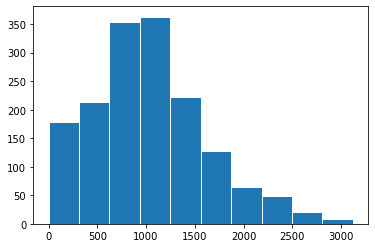

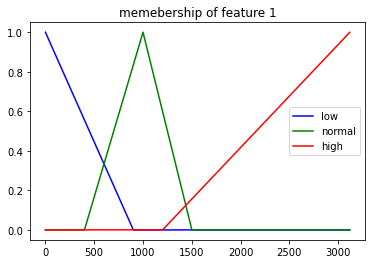

/Users/saeed/opt/anaconda3/lib/python3.9/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


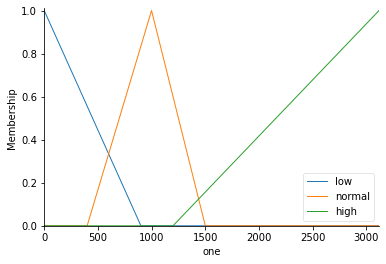

In [81]:
#feature one

one= list(Datas['f1'])

plt.figure()
plt.hist(one,edgecolor="white")
plt.show()
minn= np.min(one)
maxx = np.max(one)


dom = np.arange(minn, maxx)
onelow = skfuzzy.membership.trimf(dom ,[minn,minn,900] )
onenormal= skfuzzy.membership.trimf(dom ,[400,1000,1500] )
onehigh = skfuzzy.membership.trimf(dom ,[1200,maxx,maxx])
fuzzyfiedsets.append([onelow,onenormal,onehigh])

plt.figure()
plt.plot(onelow , 'b',label='low')
plt.plot(onenormal , 'g',label='normal')
plt.plot(onehigh , 'r',label='high')
# plt.xticks(np.arange(0,60,5))
plt.title('memebership of feature 1')
plt.legend()
plt.show()


one = ctrl.Antecedent(np.arange(minn, maxx), 'one')

one['low'] = skfuzzy.membership.trimf(dom ,[minn,minn,900] )
one['normal']= skfuzzy.membership.trimf(dom ,[400,1000,1500] )
one['high'] = skfuzzy.membership.trimf(dom ,[1200,maxx,maxx])
memberships.append([one['low'] , one['normal'] ,one['high']])

one.view()



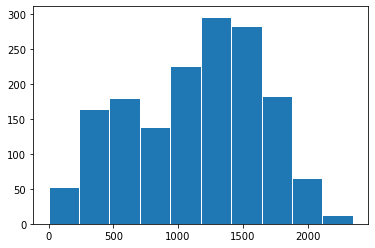

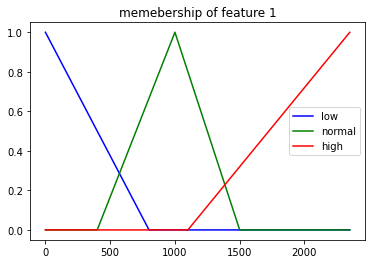

/Users/saeed/opt/anaconda3/lib/python3.9/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


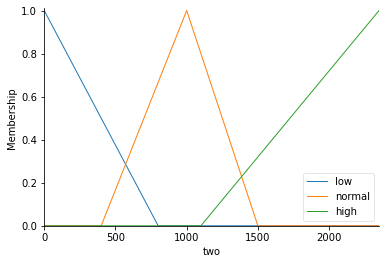

In [82]:
#feature two

two= list(Datas['f2'])

plt.figure()
plt.hist(two,edgecolor="white")
plt.show()
minn= np.min(two)
maxx = np.max(two)


dom = np.arange(minn, maxx)

twolow = skfuzzy.membership.trimf(dom ,[minn,minn,800] )
twonormal= skfuzzy.membership.trimf(dom ,[400,1000,1500] )
twohigh = skfuzzy.membership.trimf(dom ,[1100,maxx,maxx])
fuzzyfiedsets.append([twolow,twonormal,twohigh])

plt.figure()
plt.plot(twolow , 'b',label='low')
plt.plot(twonormal , 'g',label='normal')
plt.plot(twohigh , 'r',label='high')
# plt.xticks(np.arange(0,60,5))
plt.title('memebership of feature 1')
plt.legend()
plt.show()


two = ctrl.Antecedent(np.arange(minn, maxx), 'two')

two['low'] = skfuzzy.membership.trimf(two.universe ,[minn,minn,800] )
two['normal']= skfuzzy.membership.trimf(two.universe ,[400,1000,1500] )
two['high'] = skfuzzy.membership.trimf(two.universe ,[1100,maxx,maxx])
memberships.append([two['low'] , two['normal'] ,two['high']])

two.view()


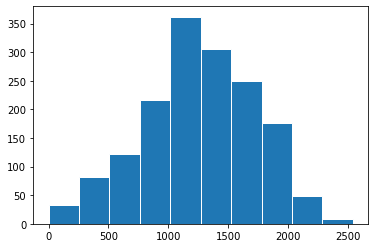

0.0


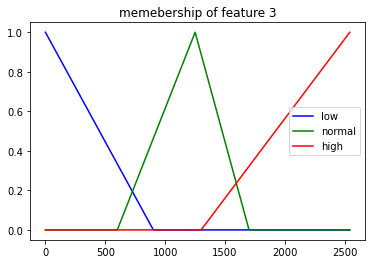

/Users/saeed/opt/anaconda3/lib/python3.9/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


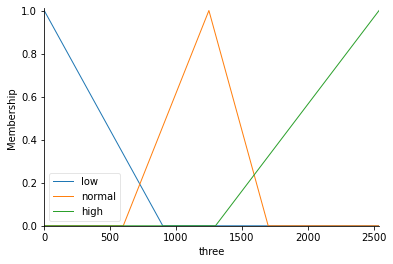

In [83]:
#feature three

three= list(Datas['f3'])

plt.figure()
plt.hist(three,edgecolor="white")
plt.show()
minn= np.min(three)
maxx = np.max(three)

print(minn)
dom = np.arange(minn, maxx,1)

threelow = skfuzzy.membership.trimf(dom ,[minn,minn,900] )
threenormal= skfuzzy.membership.trimf(dom ,[600,1250,1700] )
threehigh = skfuzzy.membership.trimf(dom ,[1300,maxx,maxx])
fuzzyfiedsets.append([threelow,threenormal,threehigh])

plt.figure()
plt.plot(threelow , 'b',label='low')
plt.plot(threenormal , 'g',label='normal')
plt.plot(threehigh , 'r',label='high')
# plt.xticks(np.arange(0,60,5))
plt.title('memebership of feature 3')
plt.legend()
plt.show()


three = ctrl.Antecedent(dom, 'three')

three['low'] = skfuzzy.membership.trimf(dom,[minn,minn,900] )
three['normal']= skfuzzy.membership.trimf(dom,[600,1250,1700] )
three['high'] = skfuzzy.membership.trimf(dom ,[1300,maxx,maxx])
memberships.append([three['low'] , three['normal'] ,three['high']])

three.view()


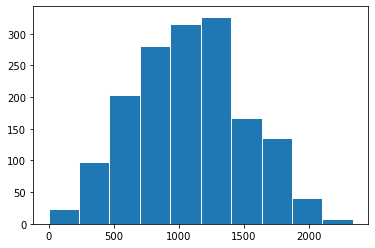

0.0


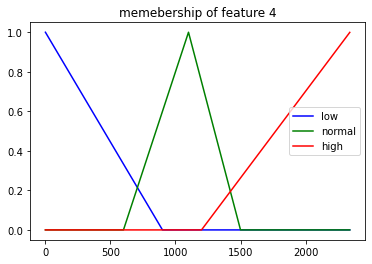

/Users/saeed/opt/anaconda3/lib/python3.9/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


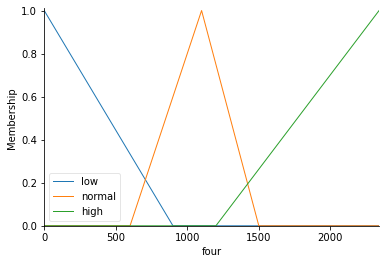

In [84]:
#feature four

four= list(Datas['f4'])

plt.figure()
plt.hist(four,edgecolor="white")
plt.show()
minn= np.min(four)
maxx = np.max(four)

print(minn)
dom = np.arange(minn, maxx,1)

fourlow = skfuzzy.membership.trimf(dom ,[minn,minn,900] )
fournormal= skfuzzy.membership.trimf(dom ,[600,1100,1500] )
fourhigh = skfuzzy.membership.trimf(dom ,[1200,maxx,maxx])
fuzzyfiedsets.append([fourlow,fournormal,fourhigh])

plt.figure()
plt.plot(fourlow , 'b',label='low')
plt.plot(fournormal , 'g',label='normal')
plt.plot(fourhigh , 'r',label='high')
# plt.xticks(np.arange(0,60,5))
plt.title('memebership of feature 4')
plt.legend()
plt.show()


four = ctrl.Antecedent(dom, 'four')

four['low'] = skfuzzy.membership.trimf(dom,[minn,minn,900] )
four['normal']= skfuzzy.membership.trimf(dom,[600,1100,1500] )
four['high'] = skfuzzy.membership.trimf(dom ,[1200,maxx,maxx])
memberships.append([four['low'] , four['normal'] ,four['high']])

four.view()

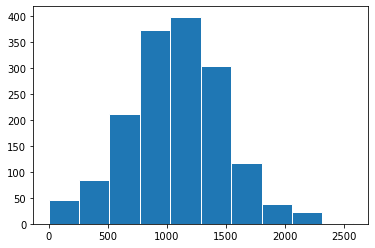

0.0


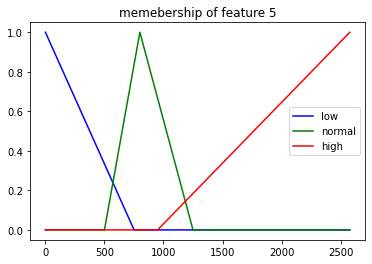

/Users/saeed/opt/anaconda3/lib/python3.9/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


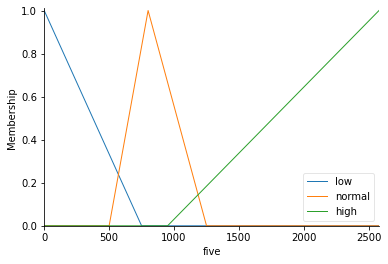

In [85]:
#feature five

five= list(Datas['f5'])

plt.figure()
plt.hist(five,edgecolor="white")
plt.show()
minn= np.min(five)
maxx = np.max(five)

print(minn)
dom = np.arange(minn, maxx,1)

fivelow = skfuzzy.membership.trimf(dom ,[minn,minn,750] )
fivenormal= skfuzzy.membership.trimf(dom ,[500,800,1250] )
fivehigh = skfuzzy.membership.trimf(dom ,[950,maxx,maxx])
fuzzyfiedsets.append([fivelow,fivenormal,fivehigh])

plt.figure()
plt.plot(fivelow , 'b',label='low')
plt.plot(fivenormal , 'g',label='normal')
plt.plot(fivehigh , 'r',label='high')
# plt.xticks(np.arange(0,60,5))
plt.title('memebership of feature 5')
plt.legend()
plt.show()


five = ctrl.Antecedent(dom, 'five')

five['low'] = skfuzzy.membership.trimf(dom,[minn,minn,750] )
five['normal']= skfuzzy.membership.trimf(dom,[500,800,1250] )
five['high'] = skfuzzy.membership.trimf(dom ,[950,maxx,maxx])
memberships.append([five['low'] , five['normal'] ,five['high']])

five.view()

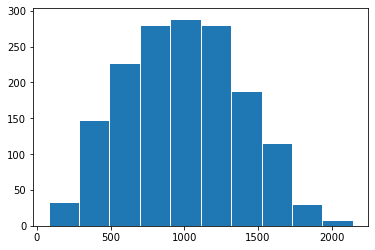

79.58085442846414


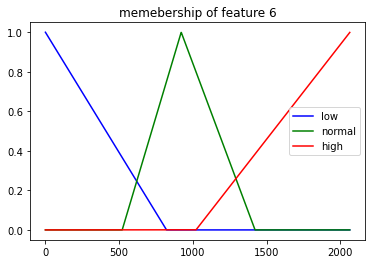

/Users/saeed/opt/anaconda3/lib/python3.9/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


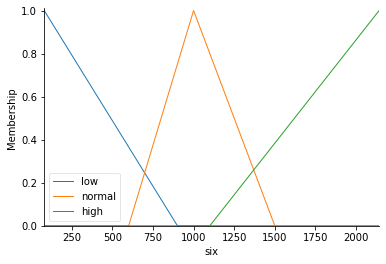

In [86]:
#feature six

six= list(Datas['f6'])

plt.figure()
plt.hist(six,edgecolor="white")
plt.show()
minn= np.min(six)
maxx = np.max(six)

print(minn)
dom = np.arange(minn, maxx,1)

sixlow = skfuzzy.membership.trimf(dom ,[minn,minn,900] )
sixnormal= skfuzzy.membership.trimf(dom ,[600,1000,1500] )
sixhigh = skfuzzy.membership.trimf(dom ,[1100,maxx,maxx])
fuzzyfiedsets.append([sixlow,sixnormal,sixhigh])

plt.figure()
plt.plot(sixlow , 'b',label='low')
plt.plot(sixnormal , 'g',label='normal')
plt.plot(sixhigh , 'r',label='high')
# plt.xticks(np.arange(0,60,5))
plt.title('memebership of feature 6')
plt.legend()
plt.show()


six = ctrl.Antecedent(dom, 'six')

six['low'] = skfuzzy.membership.trimf(dom,[minn,minn,900] )
six['normal']= skfuzzy.membership.trimf(dom,[600,1000,1500] )
six['high'] = skfuzzy.membership.trimf(dom ,[1100,maxx,maxx])
memberships.append([six['low'] , six['normal'] ,six['high']])

six.view()

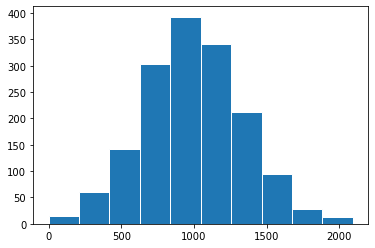

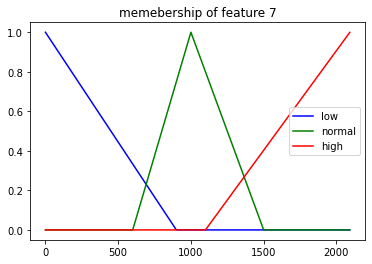

/Users/saeed/opt/anaconda3/lib/python3.9/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


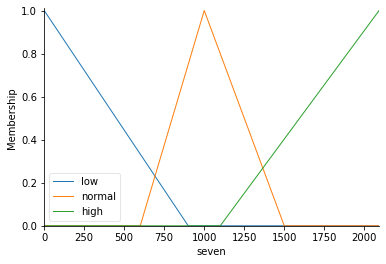

In [87]:
#feature seven

seven= list(Datas['f7'])

plt.figure()
plt.hist(seven,edgecolor="white")
plt.show()
minn= np.min(seven)
maxx = np.max(seven)

dom = np.arange(minn, maxx,1)

sevenlow = skfuzzy.membership.trimf(dom ,[minn,minn,900] )
sevennormal= skfuzzy.membership.trimf(dom ,[600,1000,1500] )
sevenhigh = skfuzzy.membership.trimf(dom ,[1100,maxx,maxx])
fuzzyfiedsets.append([sevenlow,sevennormal,sevenhigh])

plt.figure()
plt.plot(sevenlow , 'b',label='low')
plt.plot(sevennormal , 'g',label='normal')
plt.plot(sevenhigh , 'r',label='high')
# plt.xticks(np.arange(0,60,5))
plt.title('memebership of feature 7')
plt.legend()
plt.show()


seven = ctrl.Antecedent(dom, 'seven')

seven['low'] = skfuzzy.membership.trimf(dom,[minn,minn,900] )
seven['normal']= skfuzzy.membership.trimf(dom,[600,1000,1500] )
seven['high'] = skfuzzy.membership.trimf(dom ,[1100,maxx,maxx])
memberships.append([seven['low'] , seven['normal'] ,seven['high']])

seven.view()

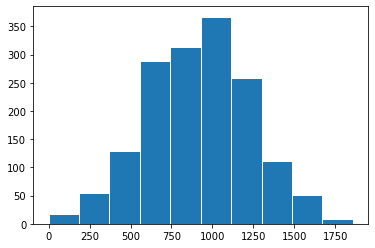

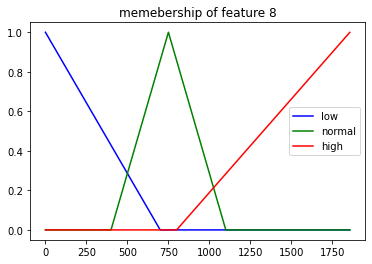

/Users/saeed/opt/anaconda3/lib/python3.9/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


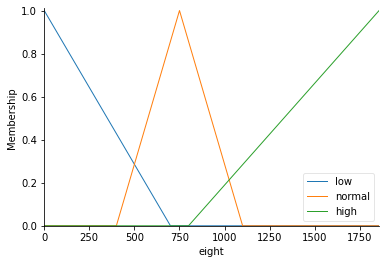

In [88]:
#feature eight

eight= list(Datas['f8'])

plt.figure()
plt.hist(eight,edgecolor="white")
plt.show()
minn= np.min(eight)
maxx = np.max(eight)

dom = np.arange(minn, maxx,1)

eightlow = skfuzzy.membership.trimf(dom ,[minn,minn,700] )
eightnormal= skfuzzy.membership.trimf(dom ,[400,750,1100] )
eighthigh = skfuzzy.membership.trimf(dom ,[800,maxx,maxx])
fuzzyfiedsets.append([eightlow,eightnormal,eighthigh])

plt.figure()
plt.plot(eightlow , 'b',label='low')
plt.plot(eightnormal , 'g',label='normal')
plt.plot(eighthigh , 'r',label='high')
# plt.xticks(np.arange(0,60,5))
plt.title('memebership of feature 8')
plt.legend()
plt.show()


eight = ctrl.Antecedent(dom, 'eight')

eight['low'] = skfuzzy.membership.trimf(dom,[minn,minn,700] )
eight['normal']= skfuzzy.membership.trimf(dom,[400,750,1100] )
eight['high'] = skfuzzy.membership.trimf(dom ,[800,maxx,maxx])
memberships.append([eight['low'] , eight['normal'] ,eight['high']])

eight.view()

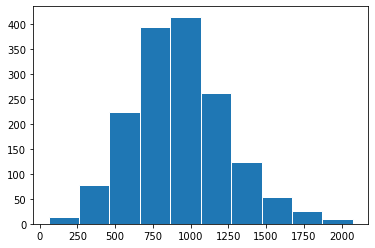

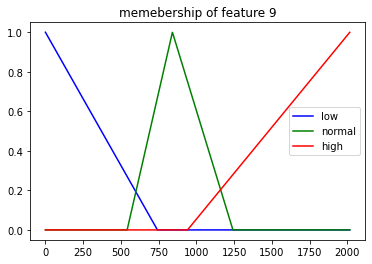

/Users/saeed/opt/anaconda3/lib/python3.9/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


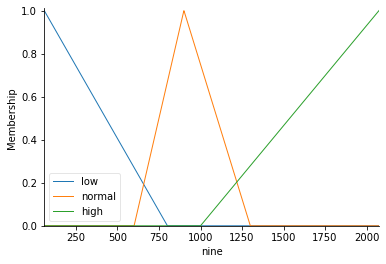

In [89]:
#feature nine

nine= list(Datas['f9'])

plt.figure()
plt.hist(nine,edgecolor="white")
plt.show()
minn= np.min(nine)
maxx = np.max(nine)

dom = np.arange(minn, maxx,1)

ninelow = skfuzzy.membership.trimf(dom ,[minn,minn,800] )
ninenormal= skfuzzy.membership.trimf(dom ,[600,900,1300] )
ninehigh = skfuzzy.membership.trimf(dom ,[1000,maxx,maxx])
fuzzyfiedsets.append([ninelow,ninenormal,ninehigh])

plt.figure()
plt.plot(ninelow , 'b',label='low')
plt.plot(ninenormal , 'g',label='normal')
plt.plot(ninehigh , 'r',label='high')
# plt.xticks(np.arange(0,60,5))
plt.title('memebership of feature 9')
plt.legend()
plt.show()


nine = ctrl.Antecedent(dom, 'nine')

nine['low'] = skfuzzy.membership.trimf(dom,[minn,minn,800] )
nine['normal']= skfuzzy.membership.trimf(dom,[600,900,1300] )
nine['high'] = skfuzzy.membership.trimf(dom ,[1000,maxx,maxx])
memberships.append([nine['low'] , nine['normal'] ,nine['high']])

nine.view()

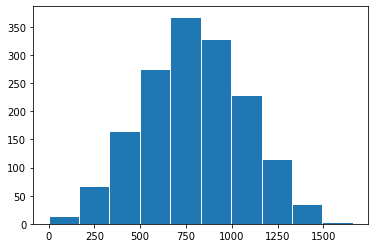

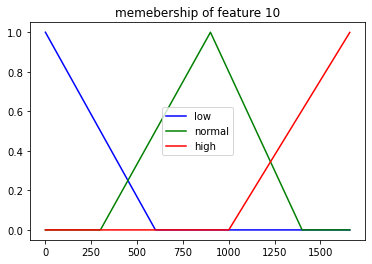

/Users/saeed/opt/anaconda3/lib/python3.9/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


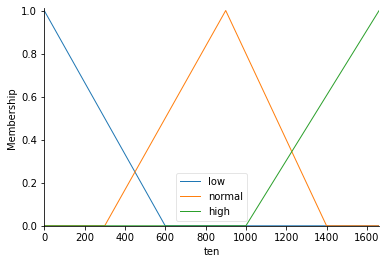

In [90]:
#feature ten

ten= list(Datas['f10'])

plt.figure()
plt.hist(ten,edgecolor="white")
plt.show()
minn= np.min(ten)
maxx = np.max(ten)

dom = np.arange(minn, maxx,1)

tenlow = skfuzzy.membership.trimf(dom ,[minn,minn,600] )
tennormal= skfuzzy.membership.trimf(dom ,[300,900,1400] )
tenhigh = skfuzzy.membership.trimf(dom ,[1000,maxx,maxx])
fuzzyfiedsets.append([tenlow,tennormal,tenhigh])

plt.figure()
plt.plot(tenlow , 'b',label='low')
plt.plot(tennormal , 'g',label='normal')
plt.plot(tenhigh , 'r',label='high')
# plt.xticks(np.arange(0,60,5))
plt.title('memebership of feature 10')
plt.legend()
plt.show()


ten = ctrl.Antecedent(dom, 'ten')

ten['low'] = skfuzzy.membership.trimf(dom,[minn,minn,600] )
ten['normal']= skfuzzy.membership.trimf(dom,[300,900,1400] )
ten['high'] = skfuzzy.membership.trimf(dom ,[1000,maxx,maxx])
memberships.append([ten['low'] , ten['normal'] ,ten['high']])

ten.view()

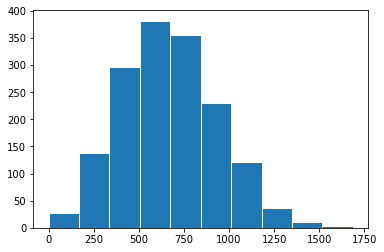

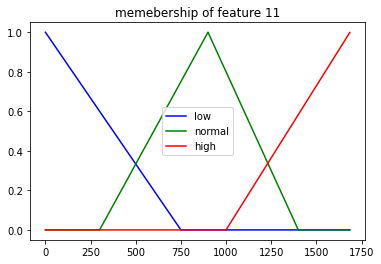

/Users/saeed/opt/anaconda3/lib/python3.9/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


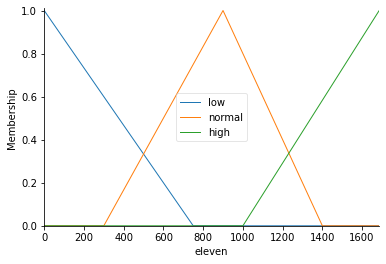

In [91]:
#feature eleven

eleven= list(Datas['f11'])

plt.figure()
plt.hist(eleven,edgecolor="white")
plt.show()
minn= np.min(eleven)
maxx = np.max(eleven)

dom = np.arange(minn, maxx,1)

elevenlow = skfuzzy.membership.trimf(dom ,[minn,minn,750] )
elevennormal= skfuzzy.membership.trimf(dom ,[300,900,1400] )
elevenhigh = skfuzzy.membership.trimf(dom ,[1000,maxx,maxx])
fuzzyfiedsets.append([elevenlow,elevennormal,elevenhigh])

plt.figure()
plt.plot(elevenlow , 'b',label='low')
plt.plot(elevennormal , 'g',label='normal')
plt.plot(elevenhigh , 'r',label='high')
# plt.xticks(np.arange(0,60,5))
plt.title('memebership of feature 11')
plt.legend()
plt.show()


eleven = ctrl.Antecedent(dom, 'eleven')

eleven['low'] = skfuzzy.membership.trimf(dom,[minn,minn,750] )
eleven['normal']= skfuzzy.membership.trimf(dom,[300,900,1400] )
eleven['high'] = skfuzzy.membership.trimf(dom ,[1000,maxx,maxx])
memberships.append([eleven['low'] , eleven['normal'] ,eleven['high']])

eleven.view()

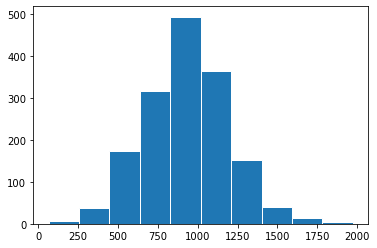

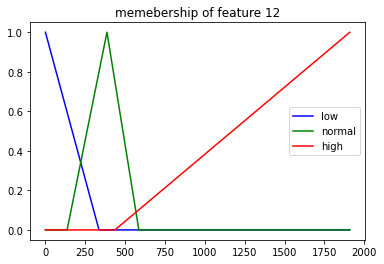

/Users/saeed/opt/anaconda3/lib/python3.9/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


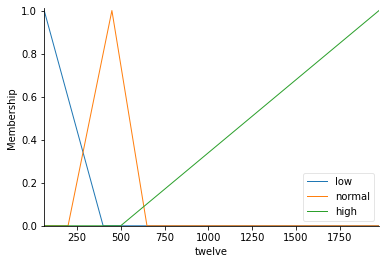

In [92]:
#feature twelve

twelve= list(Datas['f12'])

plt.figure()
plt.hist(twelve,edgecolor="white")
plt.show()
minn= np.min(twelve)
maxx = np.max(twelve)

dom = np.arange(minn, maxx,1)

twelvelow = skfuzzy.membership.trimf(dom ,[minn,minn,400] )
twelvenormal= skfuzzy.membership.trimf(dom ,[200,450,650] )
twelvehigh = skfuzzy.membership.trimf(dom ,[500,maxx,maxx])
fuzzyfiedsets.append([twelvelow,twelvenormal,twelvehigh])

plt.figure()
plt.plot(twelvelow , 'b',label='low')
plt.plot(twelvenormal , 'g',label='normal')
plt.plot(twelvehigh , 'r',label='high')
# plt.xticks(np.arange(0,60,5))
plt.title('memebership of feature 12')
plt.legend()
plt.show()


twelve = ctrl.Antecedent(dom, 'twelve')

twelve['low'] = skfuzzy.membership.trimf(dom,[minn,minn,400] )
twelve['normal']= skfuzzy.membership.trimf(dom,[200,450,650] )
twelve['high'] = skfuzzy.membership.trimf(dom ,[500,maxx,maxx])
memberships.append([twelve['low'] , twelve['normal'] ,twelve['high']])

twelve.view()

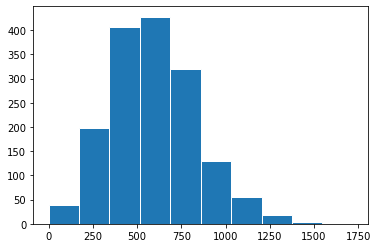

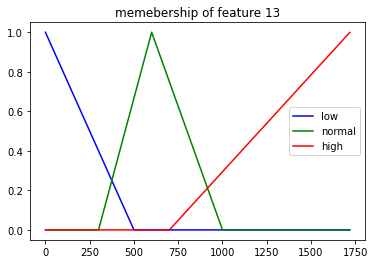

/Users/saeed/opt/anaconda3/lib/python3.9/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


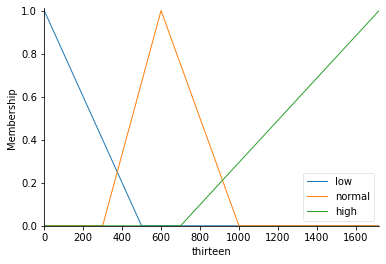

In [93]:
#feature thirteen

thirteen= list(Datas['f13'])

plt.figure()
plt.hist(thirteen,edgecolor="white")
plt.show()
minn= np.min(thirteen)
maxx = np.max(thirteen)

dom = np.arange(minn, maxx,1)

thirteenlow = skfuzzy.membership.trimf(dom ,[minn,minn,500] )
thirteennormal= skfuzzy.membership.trimf(dom ,[300,600,1000] )
thirteenhigh = skfuzzy.membership.trimf(dom ,[700,maxx,maxx])
fuzzyfiedsets.append([thirteenlow,thirteennormal,thirteenhigh])

plt.figure()
plt.plot(thirteenlow , 'b',label='low')
plt.plot(thirteennormal , 'g',label='normal')
plt.plot(thirteenhigh , 'r',label='high')
# plt.xticks(np.arange(0,60,5))
plt.title('memebership of feature 13')
plt.legend()
plt.show()


thirteen = ctrl.Antecedent(dom, 'thirteen')

thirteen['low'] = skfuzzy.membership.trimf(dom,[minn,minn,500] )
thirteen['normal']= skfuzzy.membership.trimf(dom,[300,600,1000] )
thirteen['high'] = skfuzzy.membership.trimf(dom ,[700,maxx,maxx])
memberships.append([thirteen['low'] , thirteen['normal'] ,thirteen['high']])

thirteen.view()

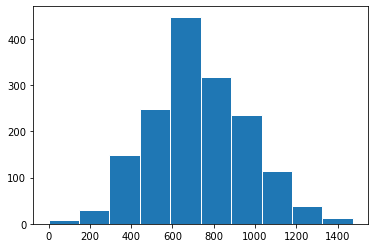

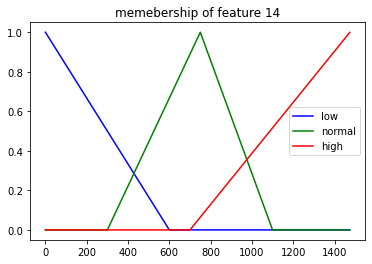

/Users/saeed/opt/anaconda3/lib/python3.9/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


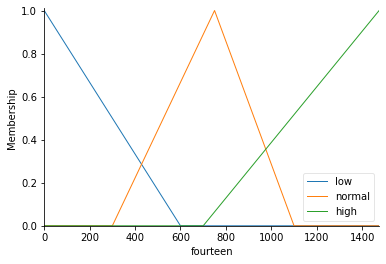

In [94]:
#feature fourteen

fourteen= list(Datas['f14'])

plt.figure()
plt.hist(fourteen,edgecolor="white")
plt.show()
minn= np.min(fourteen)
maxx = np.max(fourteen)

dom = np.arange(minn, maxx,1)

fourteenlow = skfuzzy.membership.trimf(dom ,[minn,minn,600] )
fourteennormal= skfuzzy.membership.trimf(dom ,[300,750,1100] )
fourteenhigh = skfuzzy.membership.trimf(dom ,[700,maxx,maxx])
fuzzyfiedsets.append([fourteenlow,fourteennormal,fourteenhigh])

plt.figure()
plt.plot(fourteenlow , 'b',label='low')
plt.plot(fourteennormal , 'g',label='normal')
plt.plot(fourteenhigh , 'r',label='high')
# plt.xticks(np.arange(0,60,5))
plt.title('memebership of feature 14')
plt.legend()
plt.show()


fourteen = ctrl.Antecedent(dom, 'fourteen')

fourteen['low'] = skfuzzy.membership.trimf(dom,[minn,minn,600] )
fourteen['normal']= skfuzzy.membership.trimf(dom,[300,750,1100] )
fourteen['high'] = skfuzzy.membership.trimf(dom ,[700,maxx,maxx])
memberships.append([fourteen['low'] , fourteen['normal'] ,fourteen['high']])

fourteen.view()

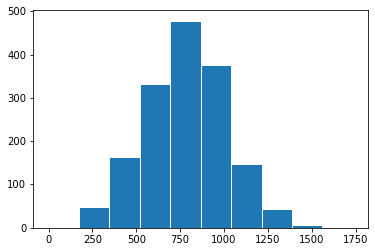

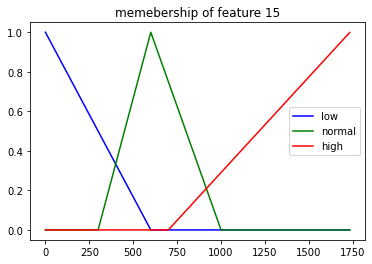

/Users/saeed/opt/anaconda3/lib/python3.9/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


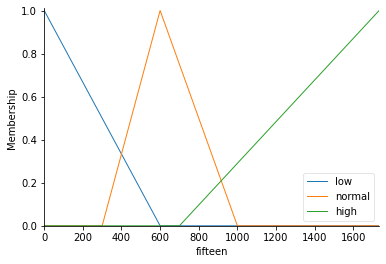

In [95]:
#feature fifteen

fifteen= list(Datas['f15'])

plt.figure()
plt.hist(fifteen,edgecolor="white")
plt.show()
minn= np.min(fifteen)
maxx = np.max(fifteen)

dom = np.arange(minn, maxx,1)

fifteenlow = skfuzzy.membership.trimf(dom ,[minn,minn,600] )
fifteennormal= skfuzzy.membership.trimf(dom ,[300,600,1000] )
fifteenhigh = skfuzzy.membership.trimf(dom ,[700,maxx,maxx])
fuzzyfiedsets.append([fifteenlow,fifteennormal,fifteenhigh])

plt.figure()
plt.plot(fifteenlow , 'b',label='low')
plt.plot(fifteennormal , 'g',label='normal')
plt.plot(fifteenhigh , 'r',label='high')
# plt.xticks(np.arange(0,60,5))
plt.title('memebership of feature 15')
plt.legend()
plt.show()


fifteen = ctrl.Antecedent(dom, 'fifteen')

fifteen['low'] = skfuzzy.membership.trimf(dom,[minn,minn,600] )
fifteen['normal']= skfuzzy.membership.trimf(dom,[300,600,1000] )
fifteen['high'] = skfuzzy.membership.trimf(dom ,[700,maxx,maxx])
memberships.append([fifteen['low'] , fifteen['normal'] ,fifteen['high']])

fifteen.view()

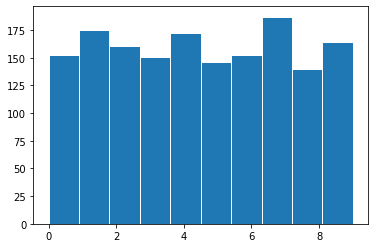

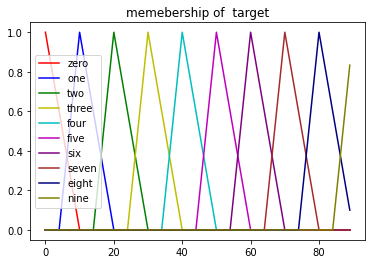

/Users/saeed/opt/anaconda3/lib/python3.9/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


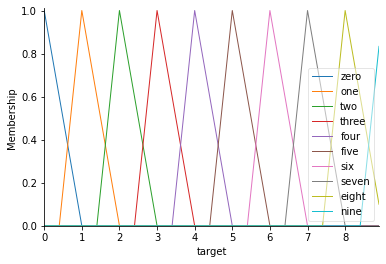

In [96]:
#TARGET 

target= list(Datas['TARGET'])

plt.figure()
plt.hist(target,edgecolor="white")
plt.show()
minn= np.min(target)
maxx = np.max(target)

dom = np.arange(minn, maxx,0.1)
targetzero = skfuzzy.membership.trimf(dom ,[0,0,1])
targetone = skfuzzy.membership.trimf(dom ,[0.4,1,2] )
targettwo= skfuzzy.membership.trimf(dom ,[1.4,2,3] )
targetthree = skfuzzy.membership.trimf(dom ,[2.4,3,4])
targetfour = skfuzzy.membership.trimf(dom ,[3.4,4,5])
targetfive = skfuzzy.membership.trimf(dom ,[4.4,5,6])
targetsix = skfuzzy.membership.trimf(dom ,[5.4,6,7])
targetseven = skfuzzy.membership.trimf(dom ,[6.4,7,8])
targeteight = skfuzzy.membership.trimf(dom ,[7.4,8,9])
targetnine = skfuzzy.membership.trimf(dom ,[8.4,9,10])

fuzzyfiedsets.append([targetzero,targetone,targettwo,targetthree,targetfour,targetfive,targetsix,targetseven,targeteight,targetnine])

plt.figure()
plt.plot(targetzero , 'r',label='zero')
plt.plot(targetone , 'b',label='one')
plt.plot(targettwo , 'g',label='two')
plt.plot(targetthree , 'y',label='three')
plt.plot(targetfour , 'c',label='four')
plt.plot(targetfive , 'm',label='five')
plt.plot(targetsix , 'purple',label='six')
plt.plot(targetseven , 'brown',label='seven')
plt.plot(targeteight , 'navy',label='eight')
plt.plot(targetnine , 'olive',label='nine')
# plt.xticks(np.arange(0,60,5))
plt.title('memebership of  target')
plt.legend()
plt.show()


target = ctrl.Antecedent(dom, 'target')

target['zero'] = skfuzzy.membership.trimf(dom ,[0,0,1])
target['one'] = skfuzzy.membership.trimf(dom ,[0.4,1,2] )
target['two']= skfuzzy.membership.trimf(dom ,[1.4,2,3] )
target['three'] = skfuzzy.membership.trimf(dom ,[2.4,3,4])
target['four'] = skfuzzy.membership.trimf(dom ,[3.4,4,5])
target['five'] = skfuzzy.membership.trimf(dom ,[4.4,5,6])
target['six'] = skfuzzy.membership.trimf(dom ,[5.4,6,7])
target['seven'] = skfuzzy.membership.trimf(dom ,[6.4,7,8])
target['eight'] = skfuzzy.membership.trimf(dom ,[7.4,8,9])
target['nine'] = skfuzzy.membership.trimf(dom ,[8.4,9,10])
memberships.append([target['zero'], target['one'] ,target['two'],target['three'],target['four'],target['five'],target['six'],target['seven'],target['eight'],target['nine']])

target.view()

In [97]:
# #TARGET 

# target= list(Datas['TARGET'])

# plt.figure()
# plt.hist(target,edgecolor="white")
# plt.show()
# minn= np.min(target)
# maxx = np.max(target)

# dom = np.arange(minn, maxx,0.1)
# targetzero = skfuzzy.membership.trimf(dom ,[0,0,0])
# targetone = skfuzzy.membership.trimf(dom ,[1,1,1] )
# targettwo= skfuzzy.membership.trimf(dom ,[2,2,2] )
# targetthree = skfuzzy.membership.trimf(dom ,[3,3,3])
# targetfour = skfuzzy.membership.trimf(dom ,[4,4,4])
# targetfive = skfuzzy.membership.trimf(dom ,[5,5,5])
# targetsix = skfuzzy.membership.trimf(dom ,[6,6,6])
# targetseven = skfuzzy.membership.trimf(dom ,[7,7,7])
# targeteight = skfuzzy.membership.trimf(dom ,[8,8,8])
# targetnine = skfuzzy.membership.trimf(dom ,[9,9,9])

# fuzzyfiedsets.append([targetzero,targetone,targettwo,targetthree,targetfour,targetfive,targetsix,targetseven,targeteight,targetnine])

# plt.figure()
# plt.plot(targetzero , 'r',label='zero')
# plt.plot(targetone , 'b',label='one')
# plt.plot(targettwo , 'g',label='two')
# plt.plot(targetthree , 'y',label='three')
# plt.plot(targetfour , 'c',label='four')
# plt.plot(targetfive , 'm',label='five')
# plt.plot(targetsix , 'purple',label='six')
# plt.plot(targetseven , 'brown',label='seven')
# plt.plot(targeteight , 'navy',label='eight')
# plt.plot(targetnine , 'olive',label='nine')
# # plt.xticks(np.arange(0,60,5))
# plt.title('memebership of  target')
# plt.legend()
# plt.show()


# target = ctrl.Antecedent(dom, 'target')

# target['zero'] = skfuzzy.membership.trimf(dom ,[0,0,0])
# target['one'] = skfuzzy.membership.trimf(dom ,[1,1,1] )
# target['two']= skfuzzy.membership.trimf(dom ,[2,2,2] )
# target['three'] = skfuzzy.membership.trimf(dom ,[3,3,3])
# target['four'] = skfuzzy.membership.trimf(dom ,[4,4,4])
# target['five'] = skfuzzy.membership.trimf(dom ,[5,5,5])
# target['six'] = skfuzzy.membership.trimf(dom ,[6,6,6])
# target['seven'] = skfuzzy.membership.trimf(dom ,[7,7,7])
# target['eight'] = skfuzzy.membership.trimf(dom ,[8,8,8])
# target['nine'] = skfuzzy.membership.trimf(dom ,[9,9,9])
# memberships.append([target['zero'], target['one'] ,target['two'],target['three'],target['four'],target['five'],target['six'],target['seven'],target['eight'],target['nine']])

# target.view()

In [98]:
a = np.array(fuzzyfiedsets,dtype=object)
print(a.shape)
memberships
b = np.array(memberships,dtype=object)
print(b.shape)
b

(16,)
(16,)


array([list([one[low], one[normal], one[high]]),
       list([two[low], two[normal], two[high]]),
       list([three[low], three[normal], three[high]]),
       list([four[low], four[normal], four[high]]),
       list([five[low], five[normal], five[high]]),
       list([six[low], six[normal], six[high]]),
       list([seven[low], seven[normal], seven[high]]),
       list([eight[low], eight[normal], eight[high]]),
       list([nine[low], nine[normal], nine[high]]),
       list([ten[low], ten[normal], ten[high]]),
       list([eleven[low], eleven[normal], eleven[high]]),
       list([twelve[low], twelve[normal], twelve[high]]),
       list([thirteen[low], thirteen[normal], thirteen[high]]),
       list([fourteen[low], fourteen[normal], fourteen[high]]),
       list([fifteen[low], fifteen[normal], fifteen[high]]),
       list([target[zero], target[one], target[two], target[three], target[four], target[five], target[six], target[seven], target[eight], target[nine]])],
      dtype=object)

In [99]:
AllRules = []
for  row  in  Datas.iterrows():
    rule=[]
    for  i , c in enumerate(Datas.columns):
        if(i !=15):
            dom = np.arange(Datas[c].min(), Datas[c].max() ,1)

            lowship = skfuzzy.interp_membership(dom ,fuzzyfiedsets[i][0],row[1][c])
            normalship = skfuzzy.interp_membership(dom ,fuzzyfiedsets[i][1],row[1][c])
            highship = skfuzzy.interp_membership(dom ,fuzzyfiedsets[i][2],row[1][c])
            rule.append(np.argmax([lowship , normalship , highship]))
    rule.append(row[1]['TARGET'])
    if (rule in AllRules):
        continue
    AllRules.append(rule)
        


In [100]:
def defineRule(AllRules , memberships,fuzzyfiedsets):
    rules = []
    for i in range (len(AllRules)):
        rl = []
        for j in range(len(AllRules[i])):
            # print(type(AllRules[i][j]))
            rl.append(memberships[j][int(AllRules[i][j])])
        rules.append(rl)
    return rules
                
    
    

In [101]:
def setrules(rules):
    label_rules = []
    for i in range(len(rules)):
        rule = ctrl.Rule(rules[i][0] & rules[i][1] & rules[i][2] & rules[i][3] & rules[i][4] & rules[i][5]& rules[i][6]& rules[i][7] & rules[i][8] & rules[i][9] & rules[i][10] & rules[i][11] & rules[i][12] & rules[i][13] & rules[i][14], rules[i][15] )
        # rule = ctrl.Rule(rules[i][0] & rules[i][1] , rules[i][2]  )
        label_rules.append(rule)
    return label_rules

In [102]:
rules = defineRule(AllRules,memberships,fuzzyfiedsets)
len(rules)

1411

In [103]:
label_rules = setrules(rules)
# label_rules

In [104]:
tipping_ctrl = ctrl.ControlSystem(label_rules)
label_result = ctrl.ControlSystemSimulation(tipping_ctrl)
memberships

KeyboardInterrupt: 

In [ ]:
count = 0
predict = []
norl = []
for j, test in TestData.iterrows():
    count = count+1
    label_result.input['one'] = test['f1']
    label_result.input['two'] = test['f2']
    label_result.input['three'] = test['f3']
    label_result.input['four'] = test['f4']
    label_result.input['five'] = test['f5']
    label_result.input['six'] = test['f6']
    label_result.input['seven'] = test['f7']
    label_result.input['eight'] = test['f8']
    label_result.input['nine'] = test['f9']
    label_result.input['ten'] = test['f10']
    label_result.input['eleven'] = test['f11']
    label_result.input['twelve'] = test['f12']
    label_result.input['thirteen'] = test['f13']
    label_result.input['fourteen'] = test['f14']
    label_result.input['fifteen'] = test['f15']
    try:

        label_result.compute()
        # label.view(sim=label_result)
        predict.append(label_result.output['TARGET'])
        
    except:
        predict.append(-1)
print(predict)